In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.close("all")

In [17]:
df=pd.read_csv('weather.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MONTH     365 non-null    object 
 1   DAY       365 non-null    int64  
 2   TEMP      365 non-null    float64
 3   HIGH      365 non-null    object 
 4   TIME      365 non-null    object 
 5   LOW       365 non-null    object 
 6   TIME.1    365 non-null    object 
 7   HDD       365 non-null    float64
 8   CDD       365 non-null    float64
 9   RAIN      365 non-null    float64
 10  W_SPEED   365 non-null    float64
 11  WINDHIGH  365 non-null    float64
 12  TIME.2    365 non-null    object 
 13  DIR       365 non-null    object 
dtypes: float64(6), int64(1), object(7)
memory usage: 40.0+ KB


In [19]:
df["MONTH"] = np.where(df["MONTH"] == " ", 'DEC',df["MONTH"])

In [20]:
df.interpolate(method='cubic',limit_direction='both',axis=0)

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.4,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4.0,29.0,12:10,N
1,JAN,2,7.2,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.6,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.7,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.2,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,DEC,27,11.9,15.8,14:30,8.5,8:10,6.4,0.0,0.2,3.9,24.1,22:50,S
361,DEC,28,13.0,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,DEC,29,11.3,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,DEC,30,9.9,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW


In [21]:
df['HIGH'] = pd.to_numeric(df['HIGH'],errors='coerce')
df['LOW'] = pd.to_numeric(df['LOW'],errors='coerce')

In [22]:
df.interpolate(method='cubic',axis=0,limit_direction='both',inplace=True)

In [23]:
print(df.to_string())

    MONTH  DAY  TEMP       HIGH   TIME        LOW TIME.1   HDD   CDD  RAIN  W_SPEED  WINDHIGH TIME.2  DIR
0     JAN    1   4.4   7.200000  15:10   2.600000   7:20  13.9   0.0   0.0      4.0      29.0  12:10    N
1     JAN    2   7.2  11.300000  14:40   3.100000   0:40  11.2   0.0   0.0      2.7      24.1  20:40    W
2     JAN    3   9.6  13.300000  14:50   6.600000   8:20   8.8   0.0   0.0      4.5      30.6  14:20   SW
3     JAN    4  10.7  14.300000  15:20   7.600000   3:30   7.7   0.0   0.0      3.2      24.1  14:40  SSW
4     JAN    5  12.2  15.400000  13:50   8.700000   7:50   6.2   0.0   0.0      7.7      56.3   0:00    S
5     JAN    6   8.6  13.400000   0:20   2.700000   0:00   9.7   0.0   4.0      9.0      45.1   0:00  SSW
6     JAN    7   0.6   2.700000   0:10  -1.300000   0:00  17.8   0.0   0.0     14.3      48.3  18:20   NW
7     JAN    8  -1.1   1.200000  13:00  -2.500000   6:10  19.4   0.0   0.0     10.0      40.2   4:40    N
8     JAN    9  -1.1   1.600000  13:20  -2.900

# ΕΡΩΤΗΜΑ **2**


In [24]:
max_abs_temp=df['HIGH'].abs().max()
max_abs_temp

42.1

In [25]:
min_abs_temp= df['LOW'].abs().min()
min_abs_temp

1.1

In [26]:
max_abs_windspeed= df['WINDHIGH'].abs().max()
max_abs_windspeed

64.4

In [27]:
avg_temp= df["TEMP"].mean()
avg_temp

17.615890410958887

In [28]:
sum_rain=df['RAIN'].sum()
sum_rain

617.8

In [29]:
sum_hdd=df['HDD'].sum()
sum_hdd

1318.4

In [30]:
sum_cdd=df['CDD'].sum()
sum_cdd

1056.2

In [31]:
df.loc[len(df)+1]=['','',avg_temp,max_abs_temp,'',min_abs_temp,'',sum_hdd,sum_cdd,sum_rain,'',max_abs_windspeed,'','']

In [32]:
df

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.40000,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4,29.0,12:10,N
1,JAN,2,7.20000,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.60000,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.70000,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.20000,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,DEC,28,13.00000,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,DEC,29,11.30000,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,DEC,30,9.90000,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW
364,DEC,31,8.90000,12.6,14:20,6.9,4:50,9.4,0.0,0.0,4.3,25.7,10:00,WNW


# **ΕΡΩΤΗΜΑ 3**

In [33]:
diamesos=df['TEMP'].median()
diamesos

16.8

In [34]:
sdv=df['TEMP'].std()
sdv

7.405256895383197

# **ΕΡΩΤΗΜΑ 4**

In [64]:
directions=df.groupby(['DIR'],as_index=False)['DIR'].agg('size')
directions

,DIR,size
0,,1
1,E,5
2,ENE,2
3,ESE,15
4,N,103
5,NE,4
6,NNW,9
7,NW,14
8,S,31
9,SE,65


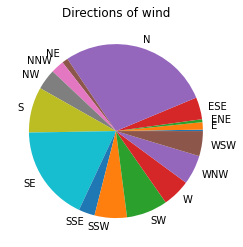

In [66]:
plt.pie(directions["size"], labels = directions["DIR"])
plt.title('Directions of wind')
plt.show()


# **ΕΡΩΤΗΜΑ 5**

In [37]:
A=df.loc[df['HIGH'] == max_abs_temp]
A['TIME']

180    16:40
366         
Name: TIME, dtype: object

In [38]:
B=df.loc[df['LOW'] == min_abs_temp]
B['TIME']

27     14:50
366         
Name: TIME, dtype: object

# **ΕΡΩΤΗΜΑ 6**

In [39]:
df_max=df.iloc[0:365,:]
df_max

,MONTH,DAY,TEMP,HIGH,TIME,LOW,TIME.1,HDD,CDD,RAIN,W_SPEED,WINDHIGH,TIME.2,DIR
0,JAN,1,4.4,7.2,15:10,2.6,7:20,13.9,0.0,0.0,4,29.0,12:10,N
1,JAN,2,7.2,11.3,14:40,3.1,0:40,11.2,0.0,0.0,2.7,24.1,20:40,W
2,JAN,3,9.6,13.3,14:50,6.6,8:20,8.8,0.0,0.0,4.5,30.6,14:20,SW
3,JAN,4,10.7,14.3,15:20,7.6,3:30,7.7,0.0,0.0,3.2,24.1,14:40,SSW
4,JAN,5,12.2,15.4,13:50,8.7,7:50,6.2,0.0,0.0,7.7,56.3,0:00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,DEC,27,11.9,15.8,14:30,8.5,8:10,6.4,0.0,0.2,3.9,24.1,22:50,S
361,DEC,28,13.0,14.9,14:10,11.3,2:20,5.3,0.0,6.6,11.4,56.3,18:40,S
362,DEC,29,11.3,14.8,14:40,8.4,5:30,7.1,0.0,15.6,4.8,37.0,13:10,SSW
363,DEC,30,9.9,13.1,13:50,7.8,23:10,8.4,0.0,0.2,3.9,25.7,11:30,SSW


In [40]:
df_max['DIFF']=(df_max['HIGH']-df_max['LOW'])
df_max['DIFF'].max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


15.599999999999998

In [45]:
df_max[['MONTH','DAY']].loc[df_max['DIFF']==df_max['DIFF'].max()]

,MONTH,DAY
132,MAY,13


# **ΕΡΩΤΗΜΑ 7**

In [46]:
directions['DIR'].loc[directions['size']==directions.max()[1]]

4    N
Name: DIR, dtype: object

# **ΕΡΩΤΗΜΑ 8**

In [47]:
C=df.loc[df['WINDHIGH'] == max_abs_windspeed]
C['DIR']

89     N
366     
Name: DIR, dtype: object

# **ΕΡΩΤΗΜΑ9**

In [48]:
 D=df.groupby('DIR', as_index=False)['TEMP'].mean()
 D


,DIR,TEMP
0,,17.615890
1,E,15.040000
2,ENE,13.000000
3,ESE,16.266667
4,N,18.579612
5,NE,15.050000
6,NNW,18.588889
7,NW,11.864286
8,S,15.945161
9,SE,18.989231


In [49]:
max_value_column = D["TEMP"].max()
MAX_DIRECTION=D.loc[D['TEMP'] == max_value_column]
MAX_DIRECTION

,DIR,TEMP
12,SW,21.039286


In [50]:
min_value_column = D["TEMP"].min()
MIN_DIRECTION=D.loc[D['TEMP'] == min_value_column]
MIN_DIRECTION

,DIR,TEMP
7,NW,11.864286


# **ΕΡΩΤΗΜΑ 10**

In [51]:
F=df[0:365].groupby('MONTH', as_index=False)['RAIN'].mean()
F

,MONTH,RAIN
0,,0.000000
1,APR,0.406667
2,AUG,0.341935
3,DEC,2.140000
4,FEB,1.121429
5,JAN,3.038710
6,JOU,1.480000
7,JUL,0.380645
8,MAR,3.574194
9,MAY,2.200000


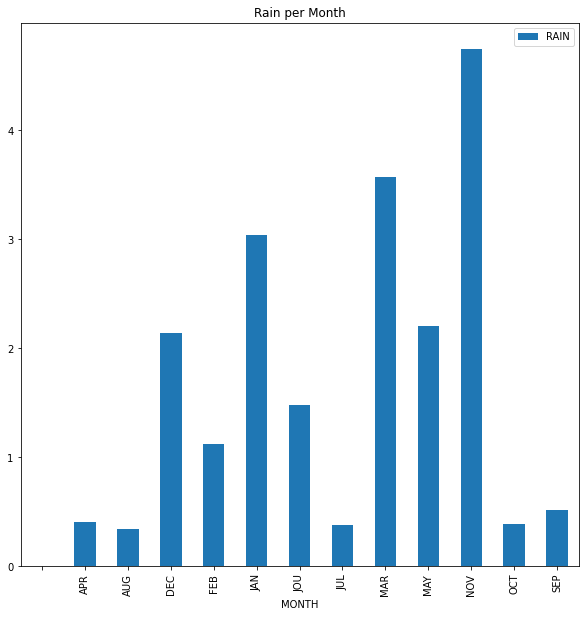

In [67]:
data=pd.DataFrame(F,columns=["MONTH","RAIN"])
data.plot(x="MONTH", y=["RAIN"], kind="bar",figsize=(10,10))
plt.title('Rain per Month')
plt.show()

## ΕΡΩΤΗΜΑ **11** 

In [ ]:
df_forecast=df[df.MONTH=='DEC']

In [ ]:
test=df_forecast[['TEMP','DAY']]
test

In [ ]:
from sklearn.linear_model import LinearRegression

X = test['DAY'].values.reshape(-1, 1) 
y= test['TEMP'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

X_predict = [[32]]
y_predict = model.predict(X_predict)

In [ ]:
y_predict#prediction

# **ΕΡΩΤΗΜΑ 12**

In [53]:
df2=df[['MONTH','TEMP']]
df2=df2[0:364]
df3=df2.iloc

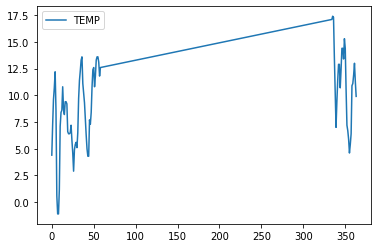

In [54]:
df3= df2[(df2.MONTH == 'JAN') | (df2.MONTH == 'FEB') | (df2.MONTH == 'DEC')]#winter
df3.plot()

In [55]:
df4= df2[(df2.MONTH == 'MAR') | (df2.MONTH == 'APR') | (df2.MONTH == 'MAY')]#spring


In [57]:
mean_au=df5.mean()
plt.figure(figsize=(10,6)) 
plt.plot(df5['TEMP'], color = 'black', label = 'temp') 
plt.legend(loc = 'best') 
plt.title( 'Mean &  Temp of Mar-May') 
plt.xlabel('Date')
plt.ylabel('Temp')

NameError: ignored

In [58]:
df5= df2[(df2.MONTH == 'JUN') | (df2.MONTH == 'JUL') | (df2.MONTH == 'AUG')]#spring


Text(0, 0.5, 'Temp')

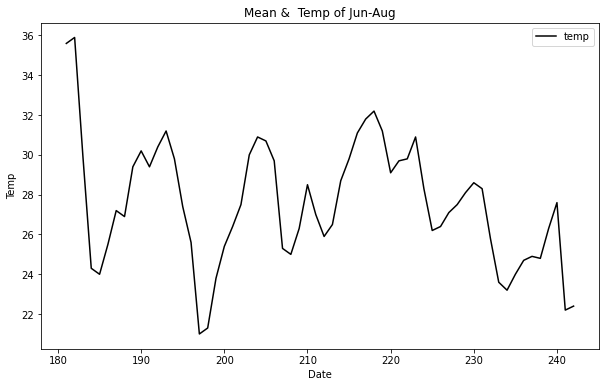

In [59]:
mean_au=df5.mean()
plt.figure(figsize=(10,6)) 
plt.plot(df5['TEMP'], color = 'black', label = 'temp') 
plt.legend(loc = 'best') 
plt.title( 'Mean &  Temp of Jun-Aug') 
plt.xlabel('Date')
plt.ylabel('Temp')

In [60]:
df6= df2[(df2.MONTH == 'SEP') | (df2.MONTH == 'OCT') | (df2.MONTH == 'NOV')]#autumn


Text(0, 0.5, 'Temp')

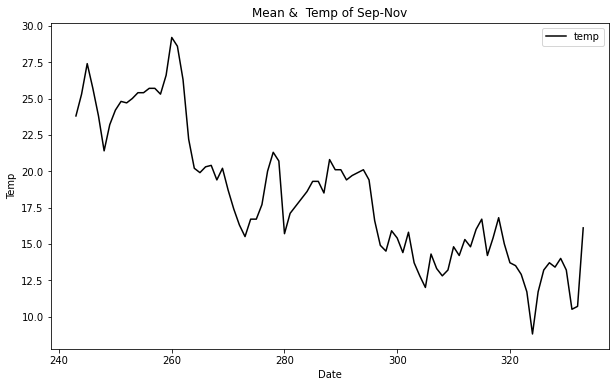

In [61]:
mean_au=df6.mean()
plt.figure(figsize=(10,6)) 
plt.plot(df6['TEMP'], color = 'black', label = 'temp') 
plt.legend(loc = 'best') 
plt.title( 'Mean &  Temp of Sep-Nov') 
plt.xlabel('Date')
plt.ylabel('Temp')
#plt.legend() 

# **ΕΡΩΤΗΜΑ 13**

In [62]:
def sum_of_rain(a):
  if a<400:
    print('Λειψυδρία')
  if a<600:
   print('Ικανοποιητικά ποσά βροχής')
  else:
    print('Υπερβολική Βροχόπτωση')

In [63]:
sum_of_rain(sum_rain)

Υπερβολική Βροχόπτωση
